In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob

#from scipy.interpolate import spline
# jupyter nbconvert xxx.ipynb --no-input

In [58]:
outputdiv = 100000
beads = 13
segments = beads-1

r_ATP500 = np.array([0.70,0.80,0.88,0.90,0.92,0.94,0.96,0.98,1.00])

In [52]:
ATP500files = glob.glob('Mstates/ATP500/MStates_Ts0.**.txt')
ATP500files = sorted(ATP500files, key=lambda x:x[-20:])

ATP2000files = glob.glob('Mstates/ATP2000/MStates_Ts0.**.txt')
ATP2000files = sorted(ATP2000files, key=lambda x:x[-20:])

In [59]:
columns = ['ts','im','mt','c','xc','yc','zc','xm','ym','zm','fx','fy','fz'] 
# ts = timestep, im = motor index, mt = motor type (active = 1, defective = 2)
# c = contact  state, xc|yc|zc = binding motor head position, xm|ym|zm = binding motor root position 
# fx|fy|fz = xyz motor force at the root??
act_m = []; act_d = []
def_m = []; def_d = []
bm_act = []; bm_def = []
ms_act = []; ms_def = []

for f in ATP500files:
    print(f) # confirm data was sorted correctly!
    ms = pd.read_csv(f, names=columns, delim_whitespace=True)
    m = ms.drop(['im','xc','yc','zc','xm','ym','zm','fx','fy','fz'],axis=1)
    m_act = m[m.mt == 1]
    ms_act.append(m_act)
    bm = m_act.groupby(m_act['ts'],as_index=False).size()
    bm_act.append(bm['size'])
    act_m.append(bm['size'].mean())
    act_d.append(bm['size'].std())
    m_def = m[m.mt == 2]
    ms_def.append(m_def)
    bm = m_def.groupby(m_def['ts'],as_index=False).size()
    bm_def.append(bm['size'])
    def_m.append(bm['size'].mean())
    def_d.append(bm['size'].std())

Mstates/ATP500/MStates_Ts0.01_S77T5ATP500R0.70.txt
Mstates/ATP500/MStates_Ts0.01_S77T5ATP500R0.80.txt
Mstates/ATP500/MStates_Ts0.01_S77T5ATP500R0.88.txt
Mstates/ATP500/MStates_Ts0.01_S77T5ATP500R0.90.txt
Mstates/ATP500/MStates_Ts0.01_S77T5ATP500R0.92.txt
Mstates/ATP500/MStates_Ts0.01_S77T5ATP500R0.94.txt
Mstates/ATP500/MStates_Ts0.01_S77T5ATP500R0.96.txt
Mstates/ATP500/MStates_Ts0.01_S77T5ATP500R0.98.txt
Mstates/ATP500/MStates_Ts0.01_S77T5ATP500R1.00.txt


In [75]:
bm_act[0]

0      17
1      37
2      55
3      61
4      71
       ..
496    63
497    72
498    69
499    68
500    67
Name: size, Length: 501, dtype: int64

In [78]:
ms_act[0]

,ts,mt,c
1,0,1,11.651672
3,0,1,1.925152
4,0,1,2.118088
5,0,1,3.847817
6,0,1,3.983622
...,...,...,...
105468,50000000,1,12.616308
105470,50000000,1,13.037731
105472,50000000,1,5.958855
105475,50000000,1,11.911949


In [107]:
# binding motor data for active motors binding in segment 1-2 => act_seg[0], ...
act_seg = [[] for _ in range(segments)]
def_seg = [[] for _ in range(segments)]
act_seg_m = []; act_seg_d = []
def_seg_m = []; def_seg_m = []

#for j in range(len(ms_act)):
j=0
for i in range(segments):
    act_seg[i] = ms_act[j][ms_act[j].c.between(i+1,i+2)]
    def_seg[i] = ms_def[j][ms_def[j].c.between(i+1,i+2)]

for i in range(segments):
    bm_seg_ = act_seg[i].groupby(act_seg[i]['ts'], as_index=False).size()
    act_seg_m.append(bm_seg_['size'].mean())
    bm_seg_ = def_seg[i].groupby(def_seg[i]['ts'], as_index=False).size()
    def_seg_m.append(bm_seg_['size'].mean())

In [108]:
len(ms_act)

9

In [109]:
act_seg[11]

,ts,mt,c
12,0,1,12.625263
32,100000,1,12.235309
34,100000,1,12.514093
59,100000,1,12.748402
61,100000,1,12.629686
...,...,...,...
105231,49900000,1,12.809237
105283,50000000,1,12.444408
105301,50000000,1,12.136218
105388,50000000,1,12.545135


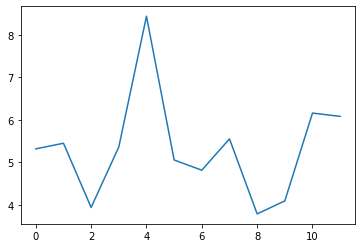

In [110]:
plt.plot(act_seg_m)

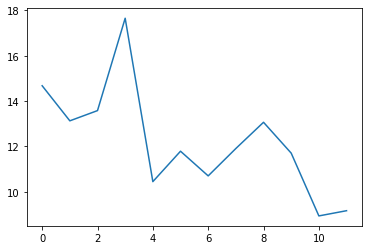

In [111]:
plt.plot(def_seg_m)

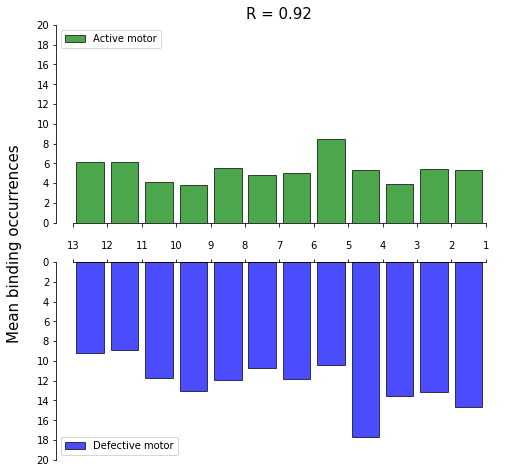

In [112]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
#plt.subplots_adjust(hspace=0.15)

bins = np.arange(1.5,13.5)
ymax = 21; ystep = 2

ax.bar(bins,act_seg_m,\
       facecolor='green', alpha=0.7, ec='black', label='Active motor')

ax.set_xticks(np.arange(1,14,1))
ax.set_yticks(np.arange(0,ymax,ystep))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_bounds(1,13)
ax.spines['left'].set_bounds(0,ymax-1)
ax.invert_xaxis()
ax.tick_params(axis='x', which='both', pad=15)
ax.legend(loc = 'upper left')
ax.set_title('R = 0.92', fontsize=15)
#======================================================

ax2.bar(bins,def_seg_m,\
        facecolor='blue', alpha=0.7, ec='black', label='Defective motor')

ax2.set_xticks(np.arange(1,14,1))
ax2.set_yticks(np.arange(0,ymax,ystep))
ax2.spines['bottom'].set_position('zero')
ax2.spines['bottom'].set_bounds(1,13)
ax2.spines['left'].set_bounds(0,ymax-1)
ax2.invert_yaxis()
ax2.invert_xaxis()
ax2.tick_params(axis='x', direction='in')#, length=6, width=2, colors='r',grid_color='r', grid_alpha=0.5)
ax2.set_xticklabels([])
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.legend(loc = 'lower left')

#fig.text(1.07, 0.5, 'Actin binding position', ha='center', fontsize=15)
fig.text(0.04, 0.5, 'Mean binding occurrences', va='center', rotation='vertical', fontsize=15)

#plt.savefig('fig5/motors_MNpos5s133R95.svg', fmt='.svg', dpi=1200, bbox_inches='tight')
#plt.savefig('fig5/motors_MNpos5s133R95.png', fmt='.png', dpi=1200, bbox_inches='tight')

plt.show()

In [84]:
act_seg_m

[4.569979716024341,
 4.392712550607287,
 4.050607287449393,
 4.554192229038855,
 4.041407867494824,
 3.951020408163265,
 4.0,
 3.68801652892562,
 3.8961303462321792,
 3.9098360655737703,
 3.9363449691991788,
 3.8230452674897117]

In [77]:
sth = act_seg[0].groupby(act_seg[0]['ts'], as_index=False).size()
sth#['size'].mean()

,ts,size
0,100000,2
1,200000,6
2,300000,4
3,400000,3
4,500000,2
...,...,...
488,49600000,7
489,49700000,3
490,49800000,8
491,49900000,8


In [72]:
act_seg[0]

,ts,mt,c
53,100000,1,1.341099
54,100000,1,1.676975
79,200000,1,1.506133
97,200000,1,1.935329
99,200000,1,1.578420
...,...,...,...
30250,50000000,1,1.238395
30255,50000000,1,1.601292
30256,50000000,1,1.486999
30259,50000000,1,1.659756


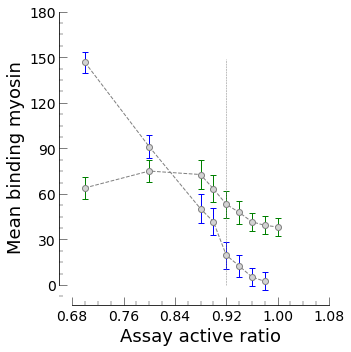

In [54]:
fig, ax = plt.subplots(1,1, figsize=(5,5))

ax.errorbar(r_ATP500,act_m,act_d, capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgrey', ecolor='green', label='Active')
ax.errorbar(r_ATP500,def_m,act_d, capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='lightgrey', ecolor='blue', label='Defective')

#ax[1].errorbar(r_pN,ac_def_pN['spec1'],ac_def_pN['dev1'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='yellow', ecolor='green', label='Active')
#ax[1].errorbar(r_pN,ac_def_pN['spec2'],ac_def_pN['dev2'], capsize=3, linestyle='--', linewidth=1, elinewidth=1, color='gray', marker='o', markerfacecolor='blue', ecolor='blue', label='Defective')

ax.plot([0.92,0.92],[0.1,149.0], linestyle='--', lw=0.5, color='gray')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['bottom'].set_position(('axes',-0.01))
ax.spines['left'].set_position(('axes',-0.05))
ax.spines['left'].set_bounds(0,180)

ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ax.set_xticks(np.arange(0.68,1.1,step=0.08))
ax.set_yticks(np.arange(0,181,30))
#ax.set_ylim(ymin=0)

#ax[1].tick_params(labelsize=18, direction='out', length=6, width=1) # colors='r', grid_color='r', grid_alpha=0.5
ax.minorticks_on()
ax.tick_params('both',direction='in',top=False,right=False,length=8, width=0.5,which='major', labelsize=14)
ax.tick_params('both',direction='in',top=False,right=False,length=4, width=0.4,which='minor', labelsize=14)

ax.set_xlabel('Assay active ratio', fontsize=18)
ax.set_ylabel('Mean binding myosin', fontsize=18)
#================================================================================



fig.tight_layout()
#plt.savefig('fig/speed_binding_R07_08t5ATP500.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/speed_binding_R07_08t5F4.6pN.pdf', format='pdf', dpi=500, bbox_inches='tight')
#plt.savefig('fig/speed_binding_R07_08t5F4.6pNMD.pdf', format='pdf', dpi=500, bbox_inches='tight')
plt.show()

In [57]:
bm_act[5]

0      21
1      38
2      41
3      36
4      41
       ..
496    57
497    48
498    50
499    46
500    47
Name: size, Length: 501, dtype: int64

In [33]:
columns = ['ts','im','mt','c','xc','yc','zc','xm','ym','zm','fx','fy','fz'] 
m = pd.read_csv('Mstates/ATP500/MStates_Ts0.01_S77T5ATP500R0.92.txt', names=columns, delim_whitespace=True)

m = m.drop(['im','xc','yc','zc','xm','ym','zm','fx','fy','fz'],axis=1)
m_act = m[m.mt == 1]
m_def = m[m.mt == 2]

In [30]:
for i in range(len(m_def)):
len(m_def[m_def.ts == 50000000])

17

In [47]:
bm = m_def.groupby(m_def['ts'],as_index=False).size()
bm['size']

0       6
1      13
2      18
3      20
4      20
       ..
496    19
497    14
498    20
499    19
500    17
Name: size, Length: 501, dtype: int64

(array([12., 65., 99., 88., 63., 72., 52., 28., 16.,  6.]),
 array([ 4. ,  7.8, 11.6, 15.4, 19.2, 23. , 26.8, 30.6, 34.4, 38.2, 42. ]),
 <BarContainer object of 10 artists>)

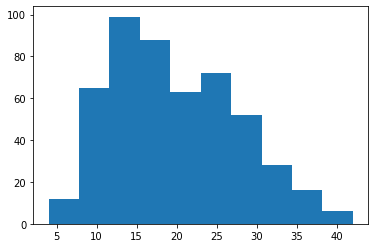

In [46]:
plt.hist(bm['size'])

In [34]:
m_act

,ts,mt,c
1,0,1,3.144075
2,0,1,4.460668
3,0,1,3.082512
4,0,1,8.021651
6,0,1,7.206278
...,...,...,...
36497,50000000,1,9.536387
36499,50000000,1,9.707130
36500,50000000,1,8.669828
36501,50000000,1,8.823624
